<a href="https://colab.research.google.com/github/BORDYR/PV-Generation-Forecasting/blob/main/dataset_time_merging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime

In [ ]:
!gdown --id 1iRvrNQ4ULh2lA-KhU2xoCuJcaj5JLDkO -O EXPORT_TenMinData-Customer_Endpoints.csv
!gdown --id 1v51odZjyQIyjhTjsb6D-UZ6d9PNGNfPi -O Weather_Data_2014-11-30.xlsx

Downloading...
From: https://drive.google.com/uc?id=1iRvrNQ4ULh2lA-KhU2xoCuJcaj5JLDkO
To: /content/EXPORT_TenMinData-Customer_Endpoints.csv
32.4MB [00:00, 103MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1v51odZjyQIyjhTjsb6D-UZ6d9PNGNfPi
To: /content/Weather_Data_2014-11-30.xlsx
19.9MB [00:00, 63.4MB/s]


In [ ]:
# DOWNLOAD DATASET
!gdown --id 1GZxDATmFkkXhX2mjBq0q5OKoT5dT22Rc -O dataset.csv

Downloading...
From: https://drive.google.com/uc?id=1GZxDATmFkkXhX2mjBq0q5OKoT5dT22Rc
To: /content/dataset.csv
100% 497k/497k [00:00<00:00, 71.0MB/s]


In [ ]:
!gdown --id 1lCYSyR5zaW_hAD3BXXk5Ma4ytOA7rSJF -O YMCA_weather_dataset.csv #https://drive.google.com/file/d/1lCYSyR5zaW_hAD3BXXk5Ma4ytOA7rSJF/view?usp=sharing
!gdown --id 1twDwmfFkegjZ6FDv8FSBFSj7lWvbCwXr -O YMCA_customer_dataset.csv #https://drive.google.com/file/d/1twDwmfFkegjZ6FDv8FSBFSj7lWvbCwXr/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1lCYSyR5zaW_hAD3BXXk5Ma4ytOA7rSJF
To: /content/YMCA_weather_dataset.csv
100% 1.33M/1.33M [00:00<00:00, 88.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1twDwmfFkegjZ6FDv8FSBFSj7lWvbCwXr
To: /content/YMCA_customer_dataset.csv
2.50MB [00:00, 80.9MB/s]


In [ ]:
endpo = pd.read_csv('EXPORT_TenMinData-Customer_Endpoints.csv', delimiter=',')

In [ ]:
dtset = pd.read_csv('dataset.csv', delimiter=',')

In [ ]:
YMCA_customer = pd.read_csv('YMCA_customer_dataset.csv', delimiter=',')
YMCA_weather = pd.read_csv('YMCA_weather_dataset.csv', delimiter=',')

In [ ]:
YMCA_weather

,Unnamed: 0,Site,Date,Month,Time,Hour,TempOut,HiTemp,LowTemp,OutHum,DewPt,WindSpeed,WindDir,WindRun,HiSpeed,HiDir,WindChill,HeatIndex,THWIndex,THSWIndex,Bar,Rain,RainRate,SolarRad,SolarEnergy,HiSolarRad,HeatD-D,CoolD-D,InTemp,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,ArcInt
0,7361,YMCA,2014-06-10,6,02:30:00,2,15.7,16.2,15.7,89,13.9,0,NNW,0.0,1,NNW,15.7,15.8,15.8,---,754.6,0.0,0.0,0,0.0,0,0.056,0.0,23.8,43,10.5,23.6,8.05,0.0728,0.0,687,1,100.0,30
1,7362,YMCA,2014-06-10,6,03:00:00,3,15.2,15.7,15.2,90,13.6,0,---,0.0,0,---,15.2,15.3,15.3,---,754.8,0.0,0.0,0,0.0,0,0.065,0.0,23.4,43,10.1,23.1,8.08,0.0729,0.0,703,1,100.0,30
2,7363,YMCA,2014-06-10,6,03:30:00,3,14.9,15.2,14.9,90,13.3,0,---,0.0,0,---,14.9,15.0,15.0,---,754.6,0.0,0.0,0,0.0,0,0.072,0.0,22.9,44,10.0,22.4,8.28,0.0730,0.0,700,1,100.0,30
3,7364,YMCA,2014-06-10,6,04:00:00,4,14.4,14.9,14.4,89,12.7,0,---,0.0,0,---,14.4,14.5,14.5,---,755.0,0.0,0.0,0,0.0,0,0.081,0.0,22.6,44,9.7,21.9,8.30,0.0732,0.0,703,1,100.0,30
4,7365,YMCA,2014-06-10,6,04:30:00,4,14.2,14.4,14.1,90,12.5,0,NNW,0.0,1,NNW,14.2,14.2,14.2,---,755.4,0.0,0.0,0,0.0,0,0.087,0.0,22.2,44,9.3,21.3,8.31,0.0733,0.0,693,1,100.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7800,15161,YMCA,2014-11-19,11,16:00:00,16,8.0,8.7,8.0,88,6.1,0,SW,0.0,1,SW,8.0,8.1,8.1,---,759.6,0.0,0.0,0,0.0,0,0.215,0.0,16.4,50,6.0,15.4,9.42,0.0754,0.0,702,1,100.0,30
7801,15162,YMCA,2014-11-19,11,16:30:00,16,8.1,8.1,7.9,90,6.5,0,SW,0.0,2,SW,8.1,8.2,8.2,---,759.8,0.0,0.0,0,0.0,0,0.214,0.0,15.8,50,5.4,14.7,9.44,0.0756,0.0,703,3,100.0,30
7802,15163,YMCA,2014-11-19,11,17:00:00,17,8.0,8.1,8.0,90,6.5,0,SSW,0.0,2,SSW,8.0,8.1,8.1,---,759.9,0.0,0.0,0,0.0,0,0.215,0.0,15.5,50,5.1,14.4,9.45,0.0757,0.0,702,3,100.0,30
7803,15164,YMCA,2014-11-19,11,17:30:00,17,7.8,8.0,7.8,90,6.3,0,SSW,0.0,3,S,7.8,7.9,7.9,---,760.3,0.0,0.0,0,0.0,0,0.219,0.0,15.4,50,5.0,14.3,9.46,0.0758,0.0,702,1,100.0,30


In [ ]:
YMCA_customer

,Unnamed: 0,Substation,datetime,t_date,t_time,d_y,d_m,d_d,d_w,t_h,t_m,V,V_Filtered,I_GEN,I_GEN_Filtered,I_IMPORT,I_IMPORT_Filtered,P_GEN,P_IMPORT,Q_GEN,Q_IMPORT,S_GEN,S_IMPORT,thdV,thdV_Filtered,thdI_GEN,thdI_IMPORT,f,Substation_VA_Filtered,Substation_VB_Filtered,Substation_VC_Filtered,Substation_thdVA_Filtered,Substation_thdVB_Filtered,Substation_thdVC_Filtered,VA_Rise,VB_Rise,VC_Rise
0,108258,YMCA,2014-06-10 02:30:00,2014-06-10,02:30:00,2014,6,10,2,2,30,246.706,246.706,0.869,0.869,30.821,30.821,-0.005,-0.074,0.008,-0.107,0.214,7.599,1.896,1.896,27.384,64.911,49.98,247.321,247.498,248.085,1.925,2.059,1.907,-0.615,-0.792,-1.379
1,108261,YMCA,2014-06-10 03:00:00,2014-06-10,03:00:00,2014,6,10,2,3,0,246.611,246.611,0.846,0.846,30.433,30.433,-0.005,-0.076,0.008,-0.104,0.208,7.508,1.904,1.904,29.417,79.759,49.97,247.287,247.545,247.936,1.938,2.047,1.887,-0.676,-0.934,-1.325
2,108264,YMCA,2014-06-10 03:30:00,2014-06-10,03:30:00,2014,6,10,2,3,30,247.890,247.890,0.854,0.854,30.399,30.399,-0.005,-0.078,0.008,-0.107,0.211,7.538,1.896,1.896,26.886,60.613,50.07,248.479,248.568,249.103,1.929,2.052,1.854,-0.589,-0.678,-1.213
3,108267,YMCA,2014-06-10 04:00:00,2014-06-10,04:00:00,2014,6,10,2,4,0,247.924,247.924,0.857,0.857,29.651,29.651,-0.005,-0.078,0.008,-0.106,0.212,7.354,1.986,1.986,20.817,56.179,49.96,248.571,248.557,249.264,1.941,2.004,1.851,-0.647,-0.633,-1.340
4,108270,YMCA,2014-06-10 04:30:00,2014-06-10,04:30:00,2014,6,10,2,4,30,247.590,247.590,0.910,0.910,30.562,30.562,-0.003,-0.076,0.070,-0.104,0.225,7.574,1.908,1.908,16.545,31.339,50.03,248.185,248.172,248.839,1.925,1.979,1.843,-0.595,-0.582,-1.249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7800,131666,YMCA,2014-11-19 16:00:00,2014-11-19,16:00:00,2014,11,19,3,16,0,241.794,241.794,0.946,0.946,3.138,3.138,-0.005,0.671,0.048,-0.153,0.229,0.759,1.110,1.110,93.811,36.704,49.98,243.040,243.045,244.082,1.026,1.073,1.016,-1.246,-1.251,-2.288
7801,131669,YMCA,2014-11-19 16:30:00,2014-11-19,16:30:00,2014,11,19,3,16,30,241.622,241.622,0.864,0.864,1.513,1.513,-0.005,0.205,0.007,-0.129,0.208,0.365,1.066,1.066,32.942,56.835,49.95,242.411,242.318,243.233,0.976,0.982,1.003,-0.789,-0.696,-1.611
7802,131672,YMCA,2014-11-19 17:00:00,2014-11-19,17:00:00,2014,11,19,3,17,0,242.088,242.088,0.900,0.900,1.262,1.262,-0.005,0.108,0.007,-0.126,0.218,0.305,1.093,1.093,31.444,39.647,49.95,242.547,242.749,243.590,0.966,0.885,0.882,-0.459,-0.661,-1.502
7803,131675,YMCA,2014-11-19 17:30:00,2014-11-19,17:30:00,2014,11,19,3,17,30,242.239,242.239,0.896,0.896,1.421,1.421,-0.005,0.172,0.007,-0.125,0.217,0.343,1.064,1.064,34.179,22.942,50.03,242.982,243.044,243.911,0.971,1.035,0.962,-0.743,-0.805,-1.672


In [ ]:
dtset

,time,TempOut,WindSpeed,WindRun,SolarRad,SolarEnergy,HeatD-D,CoolD-D,OutHum,P_GEN
0,2014-06-10 02:30:00,15.7,0,0.0,0,0.0,0.056,0.0,89,-0.005
1,2014-06-10 03:00:00,15.2,0,0.0,0,0.0,0.065,0.0,90,-0.005
2,2014-06-10 03:30:00,14.9,0,0.0,0,0.0,0.072,0.0,90,-0.005
3,2014-06-10 04:00:00,14.4,0,0.0,0,0.0,0.081,0.0,89,-0.005
4,2014-06-10 04:30:00,14.2,0,0.0,0,0.0,0.087,0.0,90,-0.003
...,...,...,...,...,...,...,...,...,...,...
7800,2014-11-19 16:00:00,8.0,0,0.0,0,0.0,0.215,0.0,88,-0.005
7801,2014-11-19 16:30:00,8.1,0,0.0,0,0.0,0.214,0.0,90,-0.005
7802,2014-11-19 17:00:00,8.0,0,0.0,0,0.0,0.215,0.0,90,-0.005
7803,2014-11-19 17:30:00,7.8,0,0.0,0,0.0,0.219,0.0,90,-0.005


In [ ]:
dtset[dtset['P_GEN'] <-0.005]

In [ ]:
endpo

,Substation,datetime,t_date,t_time,d_y,d_m,d_d,d_w,t_h,t_m,V,V_Filtered,I_GEN,I_GEN_Filtered,I_IMPORT,I_IMPORT_Filtered,P_GEN,P_IMPORT,Q_GEN,Q_IMPORT,S_GEN,S_IMPORT,thdV,thdV_Filtered,thdI_GEN,thdI_IMPORT,f,Substation_VA_Filtered,Substation_VB_Filtered,Substation_VC_Filtered,Substation_thdVA_Filtered,Substation_thdVB_Filtered,Substation_thdVC_Filtered,VA_Rise,VB_Rise,VC_Rise
0,Forest Road,2014-06-10 02:10:00,2014-06-10,02:10:00,2014,6,10,2,2,10,243.868,243.868,0.883,0.883,1.038,1.038,0.002,0.030,0.089,-0.120,-0.214,0.252,2.518,2.518,15.913,28.735,50.03,243.758,243.176,242.619,NaN,NaN,NaN,0.110,0.692,1.249
1,Forest Road,2014-06-10 02:20:00,2014-06-10,02:20:00,2014,6,10,2,2,20,243.672,243.672,0.875,0.875,1.041,1.041,0.002,0.030,0.089,-0.119,-0.212,0.253,2.547,2.547,16.971,29.211,50.01,243.617,243.198,242.658,NaN,NaN,NaN,0.055,0.474,1.014
2,Forest Road,2014-06-10 02:30:00,2014-06-10,02:30:00,2014,6,10,2,2,30,243.832,243.832,0.870,0.870,1.058,1.058,0.002,0.081,0.089,-0.110,-0.211,0.257,2.489,2.489,17.294,17.312,49.98,243.924,243.405,242.984,NaN,NaN,NaN,-0.092,0.427,0.848
3,Forest Road,2014-06-10 02:40:00,2014-06-10,02:40:00,2014,6,10,2,2,40,243.819,243.819,0.874,0.874,1.034,1.034,0.002,0.056,0.089,-0.115,-0.212,0.252,2.471,2.471,19.279,28.625,49.97,243.841,243.365,243.050,NaN,NaN,NaN,-0.022,0.454,0.769
4,Forest Road,2014-06-10 02:50:00,2014-06-10,02:50:00,2014,6,10,2,2,50,243.831,243.831,0.887,0.887,1.042,1.042,0.002,0.030,0.089,-0.120,-0.215,0.253,2.384,2.384,15.441,27.971,49.95,243.855,243.333,243.107,NaN,NaN,NaN,-0.024,0.498,0.724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131676,YMCA,2014-11-19 17:40:00,2014-11-19,17:40:00,2014,11,19,3,17,40,242.477,242.477,0.901,0.901,1.443,1.443,-0.005,0.196,0.007,-0.132,0.218,0.350,1.157,1.157,35.770,23.151,50.05,243.559,243.607,244.391,1.070,1.026,0.980,-1.082,-1.130,-1.914
131677,YMCA,2014-11-19 17:50:00,2014-11-19,17:50:00,2014,11,19,3,17,50,241.916,241.916,0.897,0.897,1.974,1.974,-0.005,0.345,0.007,-0.134,0.217,0.477,1.101,1.101,94.548,17.648,50.04,243.745,243.892,244.648,1.030,1.039,0.972,-1.829,-1.976,-2.732
131678,YMCA,2014-11-19 18:00:00,2014-11-19,18:00:00,2014,11,19,3,18,0,241.835,241.835,0.882,0.882,7.527,7.527,-0.005,1.773,0.007,-0.118,0.213,1.817,1.153,1.153,25.007,2.702,50.01,244.047,244.186,244.873,1.091,1.045,1.026,-2.212,-2.351,-3.038
131679,YMCA,2014-11-19 18:10:00,2014-11-19,18:10:00,2014,11,19,3,18,10,241.152,241.152,0.878,0.878,8.744,8.744,-0.005,2.079,0.007,-0.065,0.211,2.108,1.303,1.303,438.064,13.770,50.09,243.281,243.722,244.062,1.071,0.979,0.960,-2.129,-2.570,-2.910


In [ ]:
# pv_name = 'YMCA' #
# pv_target = endpo[endpo['Substation'].isin([pv_name])]

power = []
solar = []
#temp = []

for index, row in YMCA_customer.iterrows(): 
        pw = row['P_GEN'] # str
        power.append(pw)

for index, row in YMCA_weather.iterrows(): 
        # pw = row['P_GEN'] # str
        # power.append(pw)
        sr = row['SolarRad'] # str
        solar.append(sr/2857)
        # tp = row['TempOut'] # str
        # temp.append((tp-12)/34)
        # date = pd.Timestamp(date)
        # temp1 = wea_target[wea_target['Date'] == date]
        # if len(temp1)>0:
        #     time = row['t_time']
        #     time = datetime.datetime.strptime(time, '%H:%M:%S').time()
        #     temp2 = temp1[temp1['Time'] == time]
        #     if len(temp2)==1:
        #         if counter==0:
        #             pv_out_frame = pd.DataFrame(row).T  #pd.DataFrame(rv).T
        #             wea_out_frame = temp2
        #         else:
        #             pv_out_frame = pv_out_frame.append(pd.DataFrame(row).T)
        #             wea_out_frame = wea_out_frame.append(temp2)
        #         counter = counter+1

In [ ]:
pv_name = 'YMCA' #
#pv_target = endpo[endpo['Substation'].isin([pv_name])]
# TempOut	WindSpeed	WindRun	SolarRad	SolarEnergy	HeatD-D	CoolD-D	OutHum	P_GEN
power = []
solar = []
temp = []
windSpeed = []
windRun = []
solarRad = []
heatD = []
coolD = []
outHum = []

for index, row in dtset.iterrows(): 
        tst1 = dtset.loc[index].at['P_GEN']
        pw = row['P_GEN'] # str
        power.append(pw)
        sr = row['SolarEnergy'] # str
        solar.append(sr) #2857
        tp = row['TempOut'] # str
        # temp.append((tp-12)/34)
        temp.append(tp)

        tmp1 = row['WindSpeed'] # str
        windSpeed.append(tmp1)
        tmp1 = row['WindRun'] # str
        windRun.append(tmp1) #2857
        tmp1 = row['SolarRad'] # str
        solarRad.append(tmp1)

        tmp1 = row['HeatD-D'] # str
        heatD.append(tmp1)
        tmp1 = row['CoolD-D'] # str
        coolD.append(tmp1) #2857
        tmp1 = row['OutHum'] # str
        outHum.append(tmp1)
        # date = pd.Timestamp(date)
        # temp1 = wea_target[wea_target['Date'] == date]
        # if len(temp1)>0:
        #     time = row['t_time']
        #     time = datetime.datetime.strptime(time, '%H:%M:%S').time()
        #     temp2 = temp1[temp1['Time'] == time]
        #     if len(temp2)==1:
        #         if counter==0:
        #             pv_out_frame = pd.DataFrame(row).T  #pd.DataFrame(rv).T
        #             wea_out_frame = temp2
        #         else:
        #             pv_out_frame = pv_out_frame.append(pd.DataFrame(row).T)
        #             wea_out_frame = wea_out_frame.append(temp2)
        #         counter = counter+1

In [ ]:
 max(temp)
 tk1 = np.array(temp)
 tk1.shape
 tst1

-0.005

In [ ]:
idx = pd.MultiIndex.from_arrays([
    ['warm', 'warm', 'cold', 'cold'],
    ['dog', 'falcon', 'fish', 'spider']],
    names=['blooded', 'animal'])
idx
dtset.max()['WindRun'] #dtset.max()['WindRun'] .copy()
rqc = dtset.copy()
rqc['P_GEN'] = rqc['P_GEN']*1000
#k = dtset['P_GEN']*1000
dtset

In [ ]:
dtset['P_GEN'] = dtset['P_GEN']/dtset.max()['P_GEN']
x1 = dtset.columns.to_list()
x1[9]
for ind in x1[1:]:
    #print(ind)
    dtset[ind] = dtset[ind]/dtset.max()[ind]

In [ ]:
dtset = pd.read_csv('dataset.csv', delimiter=',')

# DATASET NORMALIZATION
column_names = dtset.columns.to_list()
for ind in column_names[1:]:
    dtset[ind] = dtset[ind]/dtset.max()[ind]

# REPLACE NEGATIVE VALUE OF P_GEN BY 0
dtset.loc[dtset['P_GEN'] < 0, 'P_GEN'] = 0

In [ ]:
#dtset.loc[(dtset.P_GEN <0),'Event']=0
dtset.loc[dtset['P_GEN'] < 0, 'P_GEN'] = 0

In [ ]:
dtset.min()

time           2014-06-10 02:30:00
TempOut                 0.00323625
WindSpeed                        0
WindRun                          0
SolarRad                         0
SolarEnergy                      0
HeatD-D                          0
CoolD-D                          0
OutHum                    0.346939
P_GEN                            0
dtype: object

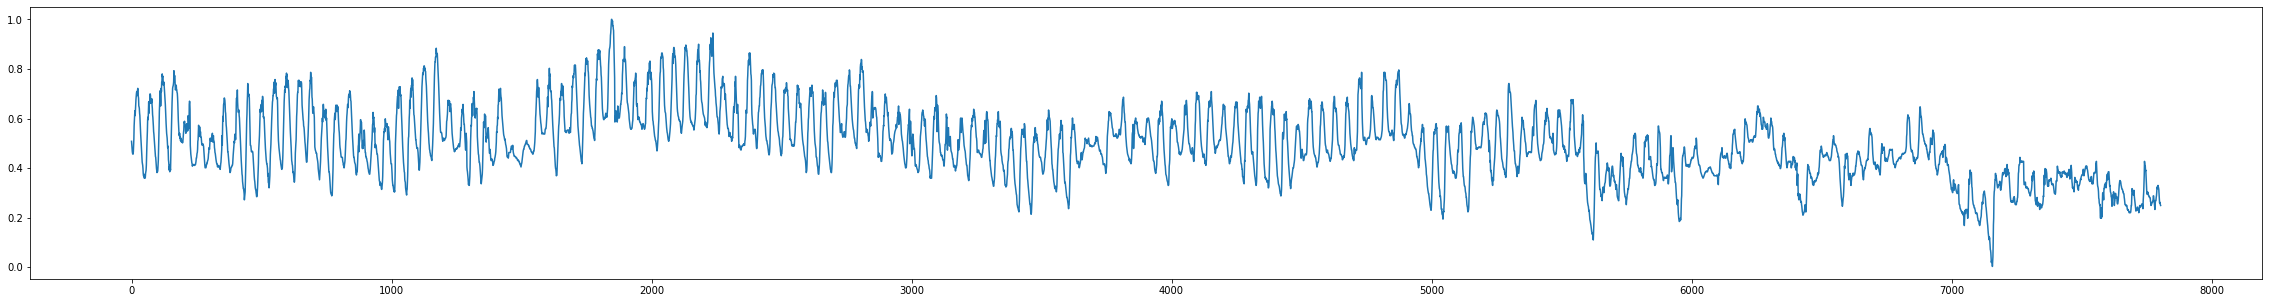

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(40)
f.set_figheight(5)
#sdf = solar-12
#solar[:] = [solar[number] - 12 for number in solar]
bn = 0
end = 7805
shift = 0
plt.plot(temp[bn:end])

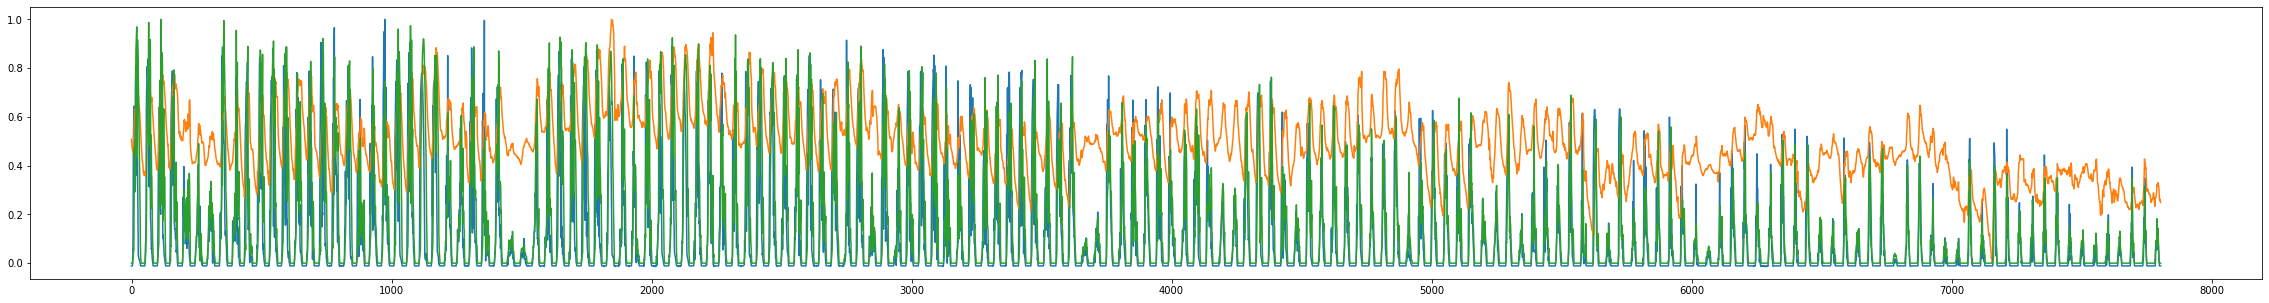

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(40)
f.set_figheight(5)
#sdf = solar-12
#solar[:] = [solar[number] - 12 for number in solar]
bn = 0
end = 7805
shift = 0
plt.plot(power[bn:end])
plt.plot(temp[bn:end])
plt.plot(solar[bn+shift:end+shift])

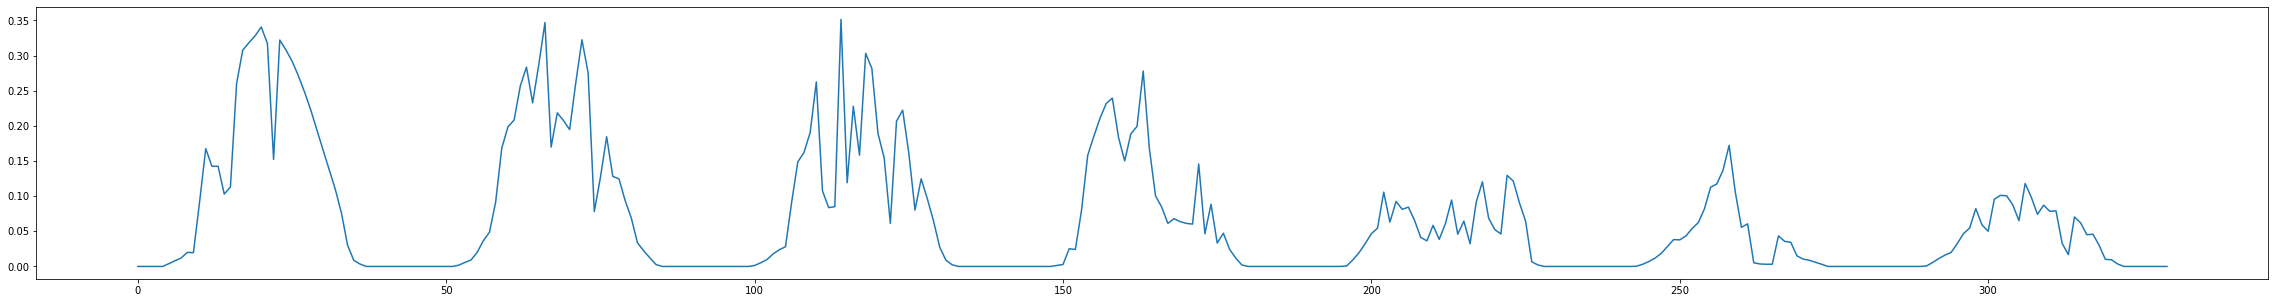

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(40)
f.set_figheight(5)

#plt.plot(power[:330])
plt.plot(solar[:330])